In [1]:
import json, pandas as pd
import matplotlib.pyplot as plt

In [2]:
def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

In [3]:
records = json.load(open('validation_runs.json', 'r'))
df = pd.DataFrame.from_records(records)
df_for_table = df[[ 'date', 'version', 'model', 'temperature', 'agnostic_acc', 'agnostic_rho', 'aware_acc', 'aware_rho', "avg_acc", "avg_rho" ]].sort_values(by='date')
styled_df = df_for_table.style.apply(highlight_max, subset=['agnostic_acc', 'agnostic_rho', 'aware_acc', 'aware_rho', 'avg_acc', 'avg_rho'])
styled_df

,date,version,model,temperature,agnostic_acc,agnostic_rho,aware_acc,aware_rho,avg_acc,avg_rho
0,2024-01-09,v1,gpt-3.5-turbo,0.700000,0.725451,0.549040,0.712575,0.541777,0.719013,0.545408
8,2024-01-09,v1,gpt-4,0.700000,0.801603,0.679521,0.762475,0.555941,0.782039,0.617731
16,2024-01-10,v1-persona,gpt-3.5-turbo,0.700000,0.715431,0.575568,0.720559,0.535034,0.717995,0.555301
14,2024-01-10,v1-persona-examples,gpt-3.5-turbo,0.700000,0.671343,0.493688,0.712575,0.524608,0.691959,0.509148
13,2024-01-11,v2,gpt-3.5-turbo,1.200000,0.709419,0.519809,0.752495,0.582654,0.730957,0.551231
7,2024-01-11,v1-conservative,gpt-3.5-turbo,0.700000,0.701403,0.540491,0.734531,0.568859,0.717967,0.554675
9,2024-01-11,v3,gpt-3.5-turbo,0.700000,0.745491,0.584922,0.718563,0.508341,0.732027,0.546631
4,2024-01-11,v2,gpt-3.5-turbo,0.200000,0.711423,0.488756,0.742515,0.528502,0.726969,0.508629
2,2024-01-11,v3,gpt-3.5-turbo,1.200000,0.735471,0.600531,0.722555,0.516681,0.729013,0.558606
6,2024-01-11,v2,gpt-3.5-turbo,0.700000,0.701403,0.526440,0.742515,0.569994,0.721959,0.548217


In [6]:
df

,version,model,date,temperature,aware_acc,aware_rho,agnostic_acc,agnostic_rho,avg_acc,avg_rho,val.model-aware,val.model-agnostic
0,v1,gpt-3.5-turbo,2024-01-09,0.7,0.712575,0.541777,0.725451,0.549040,0.719013,0.545408,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
1,v3,gpt-4,2024-01-12,1.2,0.782435,0.627895,0.821643,0.722481,0.802039,0.675188,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
2,v3,gpt-3.5-turbo,2024-01-11,1.2,0.722555,0.516681,0.735471,0.600531,0.729013,0.558606,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
3,v3,gpt-3.5-turbo,2024-01-13,1.5,0.708583,0.534737,0.717435,0.541716,0.713009,0.538226,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
4,v2,gpt-3.5-turbo,2024-01-11,0.2,0.742515,0.528502,0.711423,0.488756,0.726969,0.508629,"[{'label': 'Not Hallucination', 'p(Hallucinati...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
5,v3-persona,gpt-3.5-turbo,2024-01-13,1.2,0.736527,0.592091,0.757515,0.612149,0.747021,0.602120,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
6,v2,gpt-3.5-turbo,2024-01-11,0.7,0.742515,0.569994,0.701403,0.526440,0.721959,0.548217,"[{'label': 'Not Hallucination', 'p(Hallucinati...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
7,v1-conservative,gpt-3.5-turbo,2024-01-11,0.7,0.734531,0.568859,0.701403,0.540491,0.717967,0.554675,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
8,v1,gpt-4,2024-01-09,0.7,0.762475,0.555941,0.801603,0.679521,0.782039,0.617731,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
9,v3,gpt-3.5-turbo,2024-01-11,0.7,0.718563,0.508341,0.745491,0.584922,0.732027,0.546631,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."


In [4]:
print(df_for_table.to_markdown())

|    | date       | version             | model              |   temperature |   agnostic_acc |   agnostic_rho |   aware_acc |   aware_rho |   avg_acc |   avg_rho |
|---:|:-----------|:--------------------|:-------------------|--------------:|---------------:|---------------:|------------:|------------:|----------:|----------:|
|  0 | 2024-01-09 | v1                  | gpt-3.5-turbo      |           0.7 |       0.725451 |       0.54904  |    0.712575 |    0.541777 |  0.719013 |  0.545408 |
|  8 | 2024-01-09 | v1                  | gpt-4              |           0.7 |       0.801603 |       0.679521 |    0.762475 |    0.555941 |  0.782039 |  0.617731 |
| 16 | 2024-01-10 | v1-persona          | gpt-3.5-turbo      |           0.7 |       0.715431 |       0.575568 |    0.720559 |    0.535034 |  0.717995 |  0.555301 |
| 14 | 2024-01-10 | v1-persona-examples | gpt-3.5-turbo      |           0.7 |       0.671343 |       0.493688 |    0.712575 |    0.524608 |  0.691959 |  0.509148 |
| 13 | 202

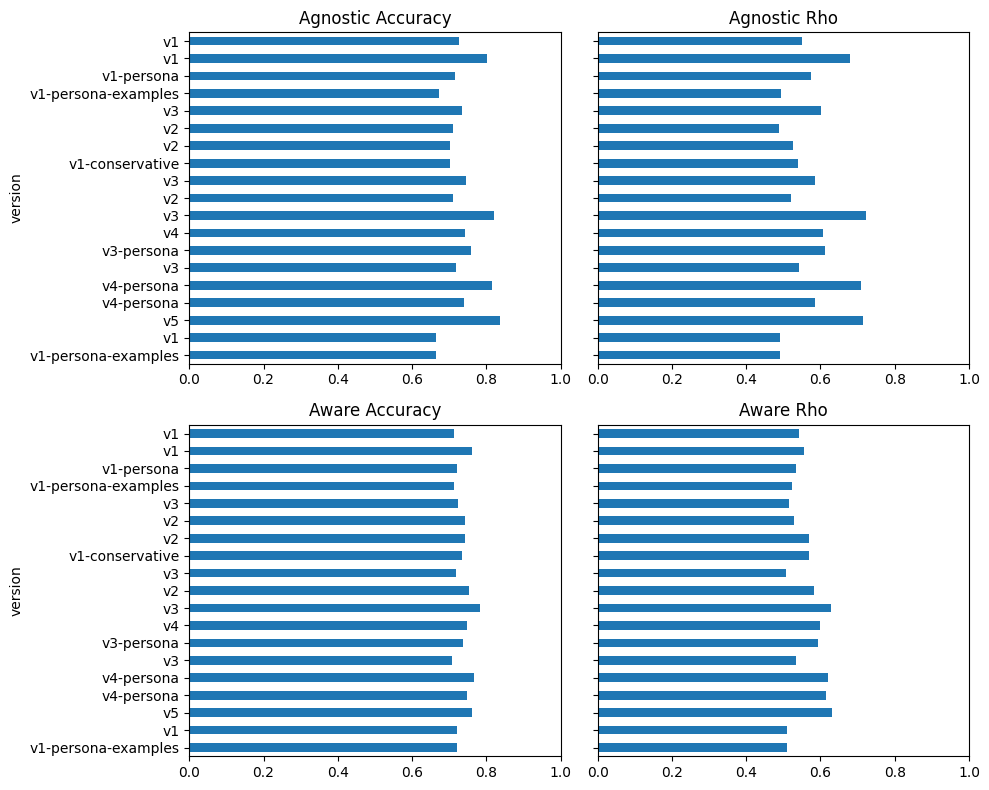

In [5]:
df_agnostic_acc = df[['version', 'date', 'agnostic_acc']].sort_values(by='date', ascending=False)
df_agnostic_rho = df[['version', 'date', 'agnostic_rho']].sort_values(by='date', ascending=False)
df_aware_acc = df[['version', 'date', 'aware_acc']].sort_values(by='date', ascending=False)
df_aware_rho = df[['version', 'date', 'aware_rho']].sort_values(by='date', ascending=False)

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plotting each DataFrame on a specific subplot
df_agnostic_acc.plot(kind='barh', x='version', legend=False, ax=axs[0, 0])
axs[0, 0].set_title('Agnostic Accuracy')
axs[0, 0].set_xlim(0, 1)

df_agnostic_rho.plot(kind='barh', legend=False, ax=axs[0, 1])
axs[0, 1].set_title('Agnostic Rho')
axs[0, 1].set_yticklabels([])
axs[0, 1].set_xlim(0, 1)

df_aware_acc.plot(kind='barh', x='version', legend=False, ax=axs[1, 0])
axs[1, 0].set_title('Aware Accuracy')
axs[1, 0].set_xlim(0, 1)

df_aware_rho.plot(kind='barh', legend=False, ax=axs[1, 1])
axs[1, 1].set_title('Aware Rho')
axs[1, 1].set_yticklabels([])
axs[1, 1].set_xlim(0, 1)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
